# Regression on Mushroom Dataset

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading csv file
mushroom = pd.read_csv("mushrooms.csv")

In [3]:
column_list = list(mushroom.columns)

In [4]:
# Data cleaning
print("Data before cleaning :",len(mushroom))
for column_i in column_list:
    mushroom = mushroom.drop(mushroom.index[mushroom[column_i].isin(['?'])])
print("Data after cleaning :",len(mushroom))

Data before cleaning : 8124
Data after cleaning : 5644


In [5]:
column_list.remove('class')

In [6]:
def normalise_column(x):
    t = dic[x]
    norm = (t-minimum)/maximum
    return norm

In [7]:
for column_name in column_list:
    list_state = list(set(list(mushroom[column_name])))
    maximum = len(list_state)
    minimum = 0
    t = enumerate(list_state)
    dic = {}
    for i,j in t:
        dic[j] = i
    mushroom[column_name] = mushroom[column_name].apply(normalise_column)


In [8]:
def classes(x):
    return class_list[x]

In [9]:
class_list = {}
column_name = 'class'
list_state = list(set(list(mushroom[column_name])))
t = enumerate(list_state)
for i,j in t:
    class_list[j] = i
mushroom[column_name] = mushroom[column_name].apply(classes)


In [10]:
X = mushroom[column_list]
Y = mushroom['class']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

In [12]:
names = ['MLP Classifier',
         'Linear SVM',
         'QDA',
         'RBF SVM'
        ]

classifiers = [
    MLPClassifier(alpha=1),
    SVC(kernel="linear", C=0.025),
    QuadraticDiscriminantAnalysis(),
    SVC(gamma=2, C=1)
]

In [13]:
accuracies = {}
for i in names:
    accuracies[i] = []
for name, clf in zip(names, classifiers):
    for i in range(99,0,-1):
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(i/100), random_state=42)
        clf.fit(X_train, Y_train)
        train_score = clf.score(X_train, Y_train)
        accuracies[name].append(train_score)
    print(name,"Done")

MLP Classifier Done
Linear SVM Done
QDA Done
RBF SVM Done


In [14]:
def plot_results(names, result_dict):
    acc = []

    plot_name = names + ' Training Accuracy'
        
    acc = result_dict[names]
    
    x = range(len(acc))

    plt.plot(x, acc)
    plt.axis([0, 100, 0, 1.1]) 
    plt.xlabel('Train Data Size')
    plt.ylabel('Accuracy')
    plt.title(plot_name)
    plt.show()

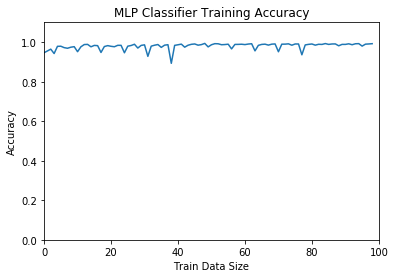

In [15]:
plot_results(names[0], accuracies)

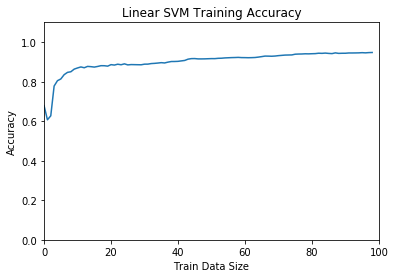

In [16]:
plot_results(names[1], accuracies)

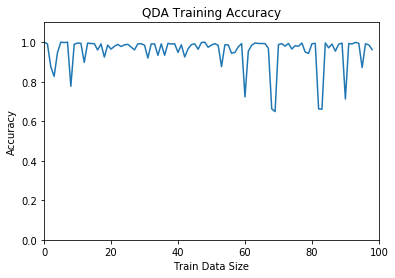

In [17]:
plot_results(names[2], accuracies)

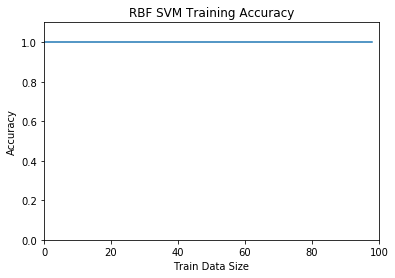

In [18]:
plot_results(names[3], accuracies)

In [19]:
def max_data_required(names,accuracies):
    maximum = {}
    for i in names:
        maximum[i] = max(accuracies[i]) - 0.001
    for i in names:
        temp = 0
        for j in range(0,len(accuracies[i])):
            if maximum[i]<=accuracies[i][j]:
                temp=j+1
                break
        print("Training Data Required for "+i+" is :",str(temp)+'%')

In [20]:
max_data_required(names,accuracies)

Training Data Required for MLP Classifier is : 49%
Training Data Required for Linear SVM is : 96%
Training Data Required for QDA is : 1%
Training Data Required for RBF SVM is : 1%
